In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df= pd.read_csv('/content/Country-data.csv.xls')
x=df
x

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
from sklearn.preprocessing import LabelEncoder
le_gender= LabelEncoder()
x['country']= le_gender.fit_transform(x['country'])
x

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
kmeans.labels_

array([4, 4, 1, 4, 1, 1, 4, 2, 2, 1, 3, 3, 4, 1, 1, 2, 4, 4, 4, 4, 4, 1,
       1, 2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 3, 3,
       2, 1, 4, 4, 4, 3, 4, 1, 4, 2, 2, 1, 4, 4, 2, 4, 3, 1, 4, 4, 4, 4,
       4, 1, 2, 4, 4, 1, 1, 2, 3, 3, 4, 2, 4, 1, 4, 4, 2, 4, 4, 1, 1, 4,
       4, 1, 1, 0, 1, 4, 4, 1, 1, 4, 3, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       2, 3, 4, 4, 0, 3, 4, 1, 4, 4, 4, 1, 3, 0, 1, 1, 4, 4, 3, 4, 1, 1,
       4, 2, 1, 3, 4, 1, 3, 3, 4, 4, 4, 1, 2, 2, 4, 4, 1, 4, 4, 4, 4, 1,
       4, 4, 4, 2, 3, 2, 1, 4, 4, 1, 4, 4, 4], dtype=int32)

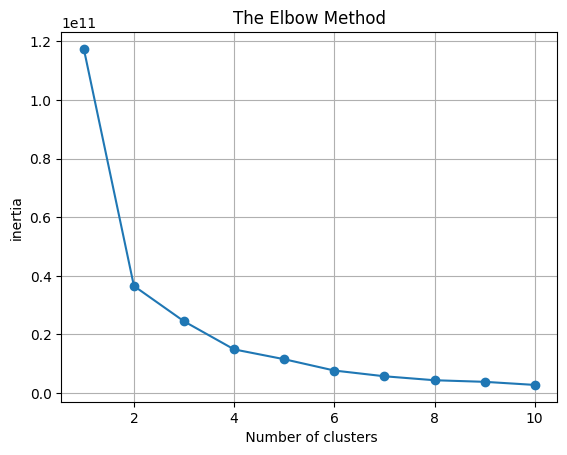

In [ ]:
all_inertia=[]
# elbow بتبص علي الخط المستقيم ثم الكيرف ثم بدايه استقامه البيانات مجددا ثم تاخذ النقطه الي قبل نقطه بدايه الاستقامه
# colab & cagel
for i in range (1,11) :
  kmeans = KMeans (n_clusters = i)
  kmeans.fit(x)
  all_inertia.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster
plt.plot (range (1,11), all_inertia, marker='o')
plt. title('The Elbow Method')
plt.xlabel (' Number of clusters')
plt.ylabel("inertia")
plt.grid()
plt.show()

In [17]:
labels = kmeans.fit_predict(x)
# labels
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silhouette = silhouette_score(x, labels)
davies_bouldin = davies_bouldin_score(x, labels)
calinski_harabasz = calinski_harabasz_score(x, labels)

print("Cluster Evaluation Metrics:")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

Cluster Evaluation Metrics:
Silhouette Score: 0.557
Davies-Bouldin Index: 0.471
Calinski-Harabasz Index: 757.523
